# Jupyter Basic Demo
This notebook shows how to download some data and plot it and play with it.

This demos a few key features (there are many more) that might be of interest:
* Once a code block is executed the variables are now in memory. This is great if some of the steps are slow data calls, downloads, or loads from file that are slow
* Declaring a variable at the end of the block will print its value when you execute the block
* matplotlib plots inline with the code
* Markdown cells allow you to document your work very nicely
* If you are playing with the data, you can work on one small subset of the code and re-run it over and over until you get things right

In [48]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import json

## Making an HTTP request to get data from an api
**Note** quandl actually has a full featured python api, this is just an example of directly hitting an api

In [49]:
payload = {
    'start_date':'2014-01-01',
    'end_date':'2017-12-31',
    'order':'asc'
}
url = f'https://www.quandl.com/api/v3/datasets/WIKI/SLB.csv'
r = requests.get(url, params=payload)
r.status_code

200

***Now we've run the cell above, the data is in memory, so we dont have to keep re-running this potentially expensive piece of code (imagine this call took several minutes to run....you wouldnt want to keep re-running it just to play with your graphs or subsequent explorations)***

## Parse the data
Here we simply extract the data from the request response into a StringIO stream (think file, but in memory), and then read into pandas. Notice how the last line df.head() displays the output of that function.

In [55]:
stream = io.StringIO(r.text)
stream.seek(0)
df = pd.read_csv(stream)
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2014-01-02,89.48,90.115,88.61,88.82,4958100.0,0.0,1.0,81.317280,81.894352,80.526644,80.717487,4958100.0
1,2014-01-03,88.94,89.350,88.21,88.35,4212000.0,0.0,1.0,80.826540,81.199139,80.163134,80.290363,4212000.0
2,2014-01-06,88.88,88.920,87.30,88.02,6370100.0,0.0,1.0,80.772014,80.808365,79.336148,79.990467,6370100.0
3,2014-01-07,88.05,88.460,86.77,87.51,6423800.0,0.0,1.0,80.017730,80.390328,78.854496,79.526991,6423800.0
4,2014-01-08,87.36,87.660,86.38,86.98,8527100.0,0.0,1.0,79.390674,79.663307,78.500074,79.045339,8527100.0


## Take a quick look
What did we just download? Here we plot the Opne, Low and High columns against date on the x axis

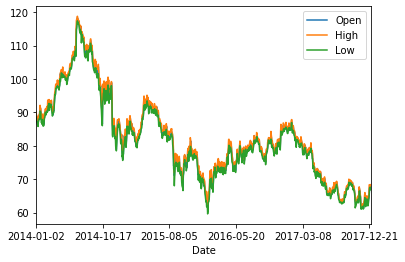

In [56]:
df[['Date','Open','High', 'Low']].plot(x='Date')

## Try a bar chart

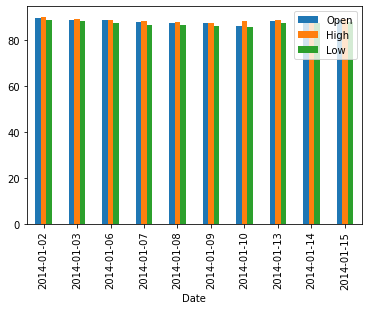

In [57]:
df[['Date','Open','High', 'Low']].iloc[:10].plot(x='Date', kind='bar')

## Plot a subset of the data by date

In [58]:
# Make sure the date column is actually a datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date           datetime64[ns]
Open                  float64
High                  float64
Low                   float64
Close                 float64
Volume                float64
Ex-Dividend           float64
Split Ratio           float64
Adj. Open             float64
Adj. High             float64
Adj. Low              float64
Adj. Close            float64
Adj. Volume           float64
dtype: object

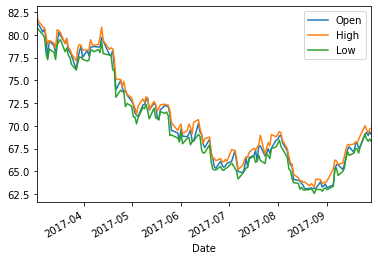

In [61]:
start_date = '03-01-2017'
end_date = '09-30-2017'
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df.loc[mask][['Date','Open','High', 'Low']].plot(x='Date')

## Play time
Pandas and data science isn't my thing, so I wanted to see how to plot the average open, low and high value of the stock by month. Since the data is in memory we can just play with the cell below, re-running over and over as we explore some functionality of pandas.

FYI - 

* the first line gives the dataframe a datetime index, required for pandas to aggregate by date.
* the second line 
    * applies the date filter 
    ```py
    .loc[mask]
    ```
    * then resamples the data by month
    ```py
    .resample('M', on='Date')
    ```
    * calculating means
    ```py
    .mean()
    ```
    * then pulls out the three columns we want to plot
    ```py
    [['Open','Low', 'High']]
    ```
    * and plots it
    ```py
    .plot()
    ```

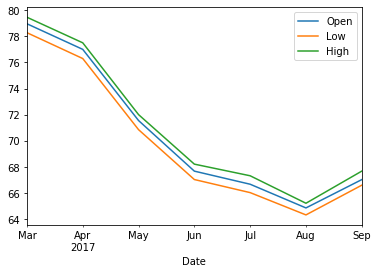

In [62]:
df.loc[mask].resample('M', on='Date').mean()[['Open','Low', 'High']].plot()